# Semantic Image Segmentation Notebook

Written by Andrew Sailer (660559942)

## What is Image Segmentation?

Image segmentation is a more complicated version of image classification where, instead of one output class for one image, every pixel of an image is classified.

[![Semantic Image segmentation](https://cdn-images-1.medium.com/max/850/1*f6Uhb8MI4REGcYKkYM9OUQ.png)](https://towardsai.net/p/l/machine-learning-7)

https://towardsai.net/p/l/machine-learning-7

In the image above, you can see the original image on top, and the segmented image below as well as a key. This image is an example of Semantic Image Segmentation, meaning that each pixel from the input image has been classified as one of the classes in the key listed at the bottom. The three most well-known types of image segmentation are Semantic, Instance, and Panoptic Image Segmentation.

[![Types of Segmentation](https://www.labellerr.com/blog/content/images/size/w2000/2022/12/banner-2-1.webp)](https://www.labellerr.com/blog/semantic-vs-instance-vs-panoptic-which-image-segmentation-technique-to-choose/#:~:text=Comparatively%20speaking%2C%20instance%20segmentation%20treats,(ii)%20an%20instance%20id.)

https://www.labellerr.com/blog/semantic-vs-instance-vs-panoptic-which-image-segmentation-technique-to-choose/#:~:text=Comparatively%20speaking%2C%20instance%20segmentation%20treats,(ii)%20an%20instance%20id.

Instance Image Segmentation is more closely related to object detection, where instances of the same class are differentiated from each other. From the image above, notice how the bottom left image contains outlines of cars which are different colors, unlike the semantically segmented image in the top right. Since we only care about the instances in the image, all pixels are not required be classified. Instance Image Segmentation may be more useful than object detection because it shows the precise outline of the instance in the image, rather than an approximate box containing an instance of a class.

Panoptic Image Segmentation is a combination of both Semantic and Instance Segmentation, detecting both class and instance information. The bottom right image has all pixels classified and uniquely distinguishes between different instances of the same class. Only certain classes have instance information, for example cars and persons above, versus other classes such as road, building, and sky are segmented semantically.

## Semantic Image Segmentation Computational Techniques

### U-Net Architecture
Some of the first moderately successful Image Segmentation Models that utilize convolutional neural networks (CNN's), fall into the category of "Fully Convolutional Networks" (FCN's), meaning the the only learnable parameters of the model are contained within the convolution layers, and not fully connected linear networks. One model in particular is called the U-Net, and its layout is shown below.

[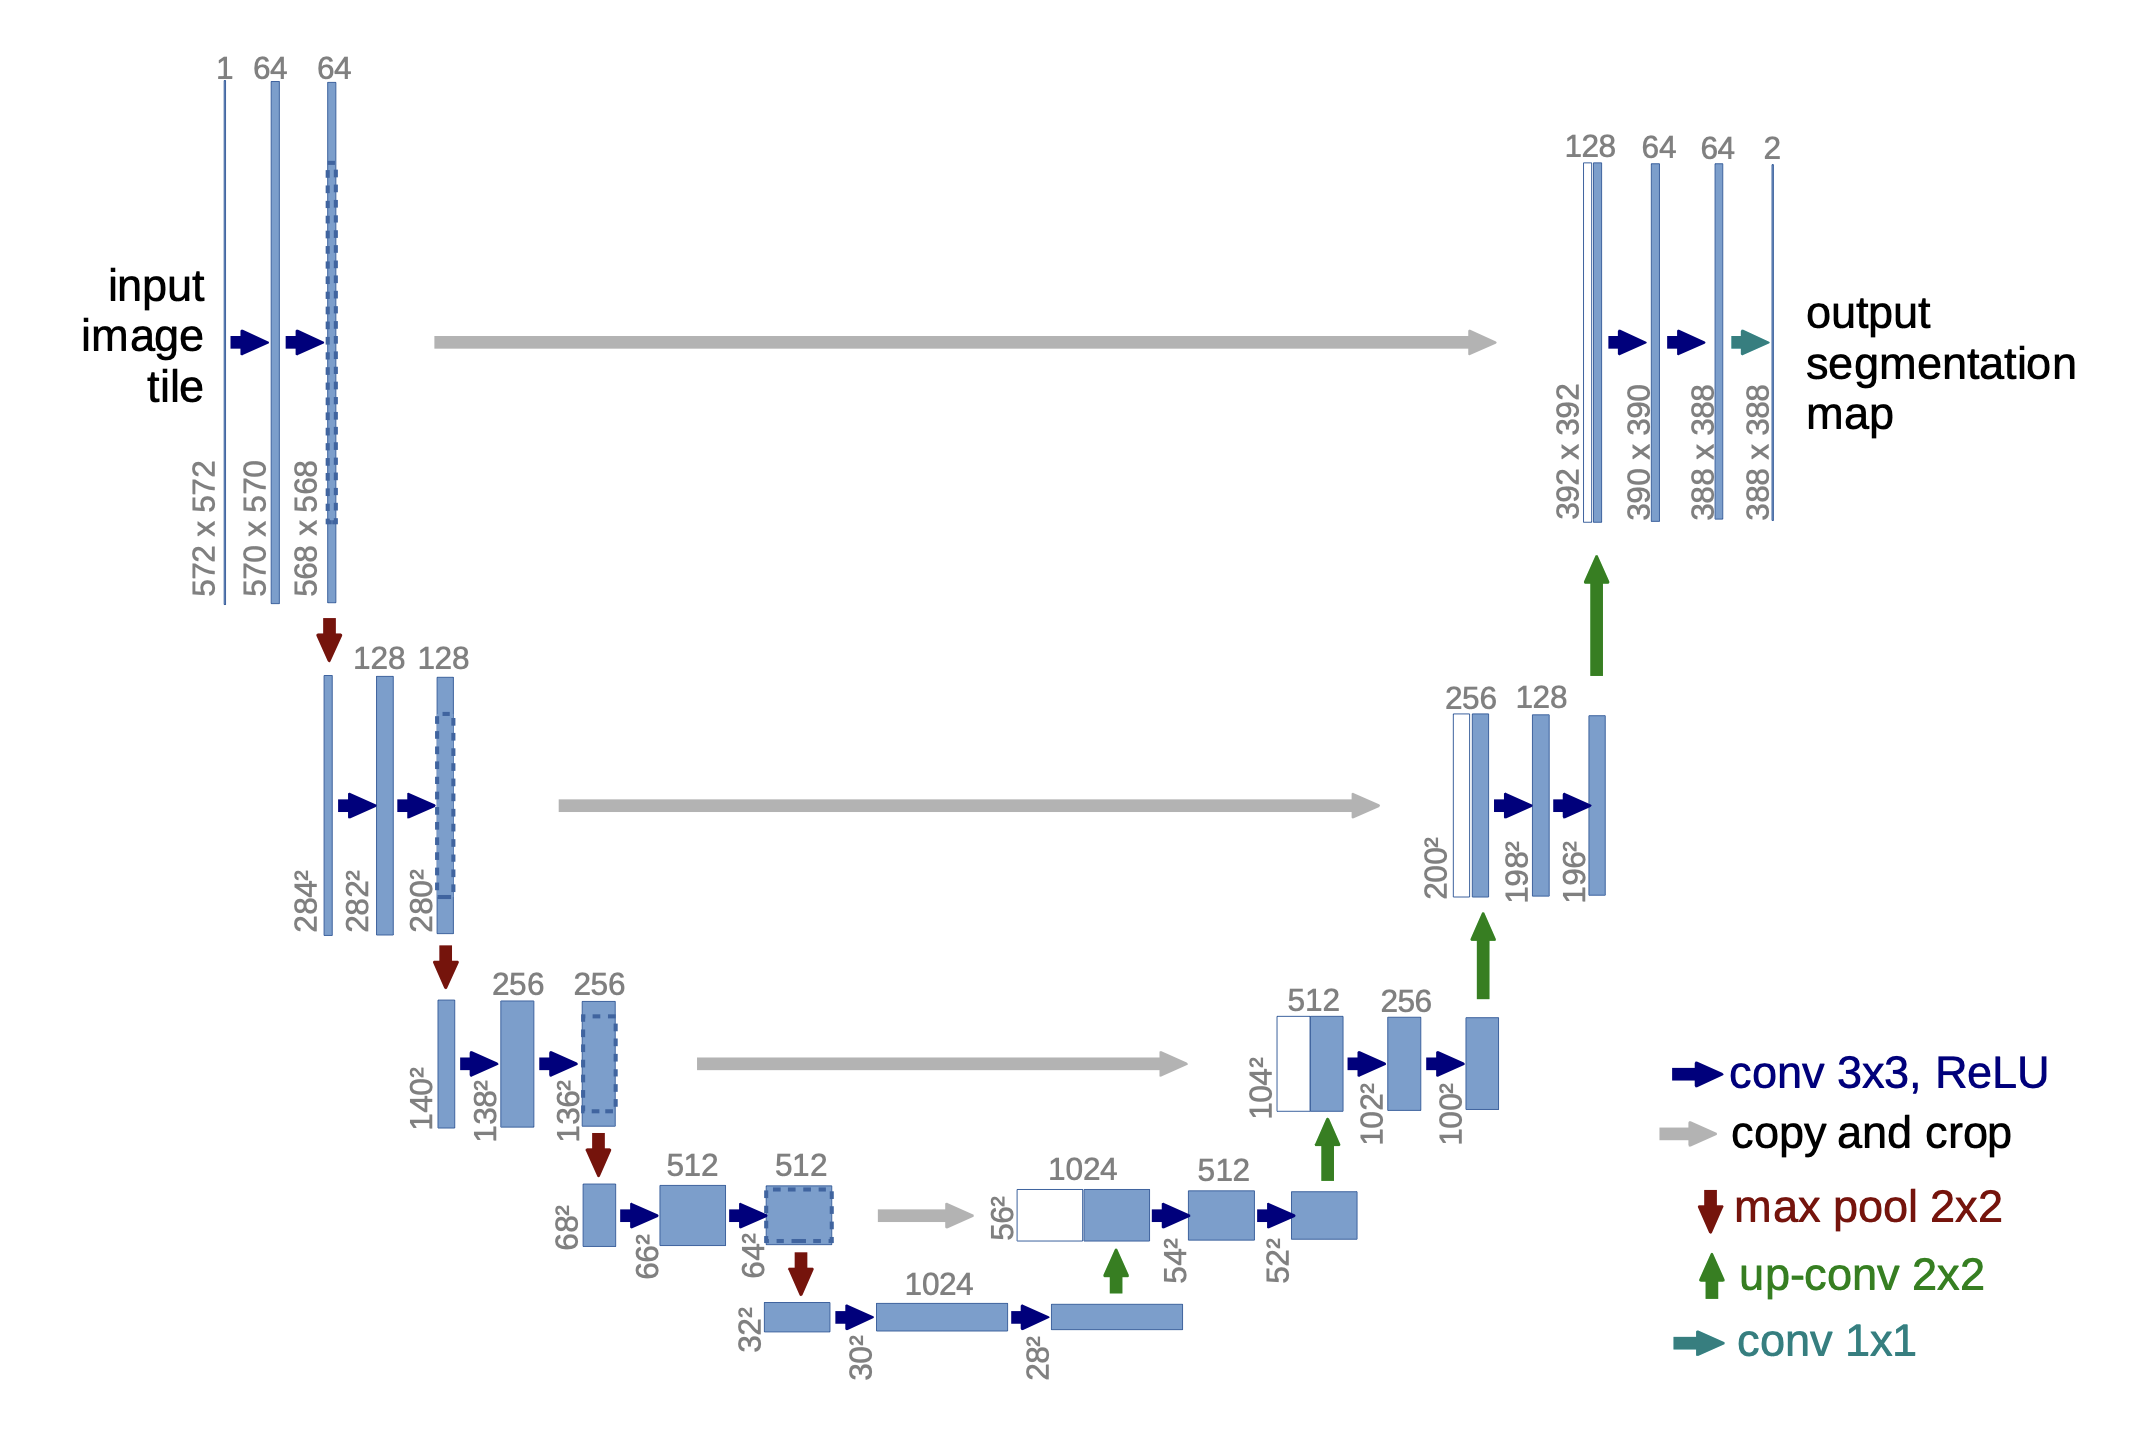](https://arxiv.org/pdf/1505.04597.pdf)

Figure from https://arxiv.org/pdf/1505.04597.pdf

The image above is from the U-Net Creators' paper and showcases how the U-Net uses CNN's and Transposed CNN's to generate segmentation masks. The left half of the network works similarly to an image classifier, detecting features of the image using convolutional filters. The right half of network is intended to propogate this information to higher resolutions. It does this by using a technique called "Transposed Convolution", also known as "Fractionally Strided Convolution" and "Deconvolution" (this last term is frowned upon by many because it is not an inverse to the convolution operation). Additionally, a skip connection occurs a few times in the middle of the network, giving it a U-shaped appearance. These skip connections are intended to mitigate the information loss that occurs during downsampling and upsampling.

### Convolution vs. Fully Connected Networks
Convolution is a critical part of all Fully Convolutional Networks, unsurprisingly. To understand why convolution performs so much better than fully connected networks, we should understand convolution first.

[![Convolution Gif](https://miro.medium.com/v2/resize:fit:488/format:webp/1*cFMF_uWgUFdVRMZAZ0Bfzg.gif)](https://medium.com/@marsxiang/convolutions-transposed-and-deconvolution-6430c358a5b6)

Figure from https://medium.com/@marsxiang/convolutions-transposed-and-deconvolution-6430c358a5b6

Convolution is an operation that preserves some sequential (1D) or spatial (2D) information unlike fully connected networks. Spatial information is bonus information from the pixels' relation to each other in space. The computation occurring is a dot product where the input is the overlap of the kernel on the image, and the result is a single scalar, or vector depending on the number of kernels used. The kernel is the small set of weights that are applied to every pixel and its neighbors in the image.

In the figure above, the blue squares represent the input pixels of the image, the black squares represent the kernel weights (only 9 weights for a one channel image), and the green squares represent the output pixels. The input image should always be larger than the kernel.

Where fully connected networks discard spatial information from the input, convolutional networks utilize it. This is how convolutional networks are able to pick out certain features from an image, such as: corners, edges, or textures. In image processing, most kernels are only 3x3, 5x5, or maybe 7x7 pixels in order to keep computation costs low. This means larger features will become difficult to detect, creating a need for pooling.

### Max Pooling
Another layer commonly found paired up with convolutional layers in CNN's, is called a Max Pooling layer. In essence, a max pool operation simply downsamples an image by taking the largest value from an n x n area. This is useful for two reasons: 1) it lowers computation costs, 2) by downsampling the image, we can use small convolutional kernels to detect large features. The figure below illustrates how a 2x2 stride 2 max pooling operation might work. 2x2 refers to the size of the area being searched, the stride refers to the amount of distance between each searched area in the input image.

![Max Pooling Figure](./images/MaxPooling.png)

Figure by the author

Read more here: https://www.educative.io/answers/what-is-a-max-pooling-layer-in-cnn

### Transposed Convolution
Convolution usually results in downsampling of the image, meaning the result has a lower resolution (fewer rows & columns) than the input. Tranposed Convolution does the opposite, resulting in upsampling.

[![Transposed Convolution Gif](https://miro.medium.com/v2/resize:fit:688/format:webp/1*KGrCz7aav02KoGuO6znO0w.gif)](https://medium.com/@marsxiang/convolutions-transposed-and-deconvolution-6430c358a5b6)

Figure from https://medium.com/@marsxiang/convolutions-transposed-and-deconvolution-6430c358a5b6

The key difference between convolution and transposed convolution is that the kernel is always larger than the input image. By having the kernel extend way past the edge of the input image, the output has larger dimensions than the input. Up sampling! The same operater is occurring as in regular convolution; a dot product.

## U-Net Implementation

The plan for implementing the unet
1. Read Data
2. Make a U-Net Model
3. Loss and Optimization
4. Model Traing
5. Model Testing
6. Visualization of results

### Read the Data

In this notebook, we will be using Pascal VOC2012 image segmentation dataset. From Pascal VOC2012's website, we see there are 20 classes:

0. background
1. aeroplane
2. bicycle
3. bird
4. boat
5. bottle
6. bus
7. car
8. cat
9. chair
10. cow
11. diningtable
12. dog
13. horse
14. motorbike
15. person
16. pottedplant
17. sheep
18. sofa
19. train
20. tvmonitor
21. excluded fom learning (255)

There's actually 22 classes if you include the background and exclusions, more on that later.

To download the dataset, run the next two blocks of code. Pytorch's torchvision library makes it easy for us to install. As we load in the data it should be noted that all images are being downsampled to 192x256 pixels (via interpolation). This is done to reduce computatational cost and enable us to run this model on a local machine with relative ease.

In [1]:
# Import Python Libraries here

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Pascal VOC Segmentation Dataset
# http://host.robots.ox.ac.uk/pascal/VOC/ 
from torchvision.datasets import VOCSegmentation


In [2]:
# Download the Data

# desired image size
image_size = (192, 256) # (rows, cols)

# converts image to tensor and resizes
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize(image_size, antialias=False)])

# same as above
target_transform = transforms.Compose([transforms.PILToTensor(),
                                       transforms.Resize(image_size, antialias=False, interpolation=transforms.InterpolationMode.NEAREST)])

# ~2 GB
voc_train =  VOCSegmentation(root="./data", image_set="train", download=True, transform=transform, target_transform=target_transform)

# ~2 GB
voc_test = VOCSegmentation(root="./data", image_set="val", download=True, transform=transform, target_transform=target_transform)

Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
Extracting ./data/VOCtrainval_11-May-2012.tar to ./data
Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
Extracting ./data/VOCtrainval_11-May-2012.tar to ./data


DATASET
number of training samples:	1464
number of testing samples:	1449


IMAGE
shape of image:			torch.Size([3, 192, 256])
shape of target:		torch.Size([1, 192, 256])
Classes contained in image:	tensor([  0,   1,  15, 255], dtype=torch.uint8)


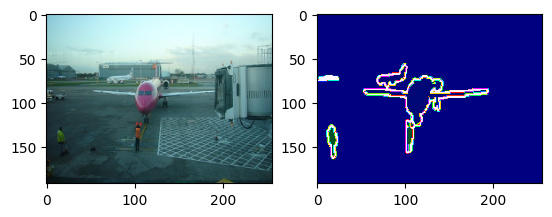

In [5]:
print("DATASET")
print("number of training samples:\t" + str(len(voc_train)))
print("number of testing samples:\t" + str(len(voc_test)))

# Change this number for a different sample
image_sample = 0

img, targ = voc_train[image_sample]
print("\n\nIMAGE")
print("shape of image:\t\t\t" + str(img.shape))
print("shape of target:\t\t" + str(targ.shape))
print("Classes contained in image:\t" + str(targ.unique()))

img = torch.transpose(img, 0, 1)
img = torch.transpose(img, 1, 2)

targ = targ.squeeze()

figure = plt.figure()
figure.add_subplot(1, 2, 1)
plt.imshow(img)
figure.add_subplot(1, 2, 2)
plt.imshow(targ, cmap="gist_ncar")

### Make a U-Net Model


![unet image](./images/U-Net%20Model.png)

Figure by author

By following the lead of Harshall Lamba, in [this article](https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47), we can craft a fully convolutional neural network specialized for our use case. As stated in the data reading section, our input will be a 192x256 3-channel (color) image. The output will be in the form of a 21-channel image with the same resolution where each channel corresponds to the probability of a given pixel belonging to a certain class.

The left half of the model uses convolutions and max pooling to reduce the resolution of the image, the right half uses transposed convolution to upscale while incorporating in skip connections with concatenation and convolution again.

In [3]:
# make model with pytorch
class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        # ENCODER           (Channel, Height, Width)

        # 3x3 conv          (3, 192, 256) -> (16, 192, 256)
        self.enc1_conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding="same")
        # 2x2 maxpool       (16, 192, 256) -> (16, 96, 128)
        self.enc2_pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 3x3 conv          (16, 96, 128) -> (32, 96, 128)
        self.enc3_conv = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding="same")
        # 2x2 maxpool       (32, 96, 128) -> (32, 48, 64)
        self.enc3_pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 3x3 conv          (32, 48, 64) -> (64, 48, 64)
        self.enc4_conv = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding="same")
        # 2x2 maxpool       (64, 48, 64) -> (64, 48, 64)
        self.enc4_pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # 3x3 conv          (64, 48, 64) -> (128, 24, 32)
        self.enc5_conv = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding="same")

        # DECODER
        # upsample          (128, 24, 32) -> (64, 48, 64)
        self.dec5_up   = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=2, stride=2)
        # skip connection   (64, 48, 64) -> (128, 48, 64)
        # 3x3 conv          (128, 48, 64) -> (64, 48, 64)
        self.dec5_conv = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding="same")
        
        # upsample          (64, 48, 64) -> (32, 96, 128)
        self.dec4_up   = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=2, stride=2)
        # skip connection   (32, 96, 128) -> (64, 96, 128)
        # 3x3 conv          (64, 96, 128) -> (32, 96, 128)
        self.dec4_conv = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding="same")

        # upsample          (32, 96, 128) -> (16, 192, 256)
        self.dec3_up   = nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=2, stride=2)
        # skip connection   (16, 192, 256) -> (32, 192, 256)
        # 3x3 conv          (32, 192, 256) -> (21, 192, 256)
        self.dec3_conv = nn.Conv2d(in_channels=32, out_channels=21, kernel_size=3, stride=1, padding="same")

    def forward(self, x):
        # ENCODER
        x = self.enc1_conv(x)
        x = torch.relu(x)
        skip2 = x
        x = self.enc2_pool(x)
        x = self.enc3_conv(x)
        x = torch.relu(x)
        skip3 = x
        x = self.enc3_pool(x)
        x = self.enc4_conv(x)
        x = torch.relu(x)
        skip4 = x
        x = self.enc4_pool(x)
        x = self.enc5_conv(x)
        x = torch.relu(x)

        # DECODER
        x = self.dec5_up(x)
        x = torch.cat((x, skip4), 1)
        x = self.dec5_conv(x)
        x = torch.relu(x)
        x = self.dec4_up(x)
        x = torch.cat((x, skip3), 1)
        x = self.dec4_conv(x)
        x = torch.relu(x)
        x = self.dec3_up(x)
        x = torch.cat((x, skip2), 1)
        x = self.dec3_conv(x)
        return x
    
net = Unet()

# How many trainable parameters does our model have?
trainable_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print("Trainable parameters: " + str(trainable_params))


Trainable parameters: 238885


### Loss and Optimization

We will be using cross entropy loss for out loss function due its usefulness when dealing with multiple classes.

For the optimizer we will use Adam which is similar to Stochastic Gradient Descent, but with a little more math behind the scenes to speed up convergence.|

In [5]:
# optimizer & loss criterion
loss_criterion = nn.CrossEntropyLoss(ignore_index=255)

optimizer = optim.Adam(net.parameters(), lr=0.001)

### Training

Image Segmentation uses a supervised learning algorithm for training. Supervised learning means the training data is labeled and the model can check its performance by comparing its prediction against the groundtruth label. For example, in image classification, the model generates a guess at the class it thinks best represents an image. This is then compared against the label of the image. A score called "loss" is used to measure the model's performance/accuracy. The optimizer then calculates a "gradient" used to manipulate the models parameters, and hopefully improve its performance next iteration. The gradient represent how much the model's parameters are changed in one iteration. It is dependent on both the optimizer's learning rate and the model's loss.

Image segmentation is similar to image classification, but now our model predicts a class for every pixel in the 192x256 image. This means its prediction gets compared 192x256 times aginst the groundtruth label. The rest of the training algorithm is the same as with image classification.

In general the training loop looks like this:
1. Pass a sample from the training data through the model to get a prediction
2. Calculate the loss from the prediction and label
3. Calculate the gradient with the loss and the optimizer
4. Apply the gradients to the model's paramters
5. Repeat steps 1-4 for the entire training set
6. Repeat the ENTIRE sequence for all epochs

Additionally, it is common practice to read in multiple samples from the training set for one iteration of training. The number of samples is determined by the "batchsize", a parameter passed into Pytorch's DataLoader. The purpose of using multiple samples at once is to generate gradients more likely to improve the model. For example, during training the model may happen upon similar images consecutively, meaning the gradients would optimize for that type of image for a short period of time. This may decrease the model's performance overall as the model now performs poorly on all other types of images. To put is succinctly, using more samples to generate gradients makes training the model easier.

In [6]:
# train model

# DATALOADER
batchsize = 32
trainloader = DataLoader(voc_train, batch_size=batchsize, shuffle=True)


# DEVICE
device = torch.device("cpu")

net.train()
epochs = 10
for i in range(epochs):
    running_loss = 0

    for j, data in enumerate(trainloader, 0):
        # unpack data
        image, target = data
        image = image.to(device)
        target = target.squeeze().to(device)

        # forward pass
        output = net.forward(image)

        # get loss
        loss = loss_criterion(output, target.long())

        # zero gradients
        optimizer.zero_grad()

        # calculate gradients
        loss.backward()

        # apply gradients
        optimizer.step()

        # print loss
        running_loss += loss.item()
        # print("loss\t" + str(running_loss / (j + 1)))

    print("[epoch, loss] = ", (i, running_loss / (j + 1)))


[epoch, loss] =  (0, 1.7979676257009092)
[epoch, loss] =  (1, 1.3489030755084495)
[epoch, loss] =  (2, 1.3011166064635566)
[epoch, loss] =  (3, 1.2761175451071367)
[epoch, loss] =  (4, 1.2576929512231245)
[epoch, loss] =  (5, 1.2503092159395632)
[epoch, loss] =  (6, 1.2377118805180425)
[epoch, loss] =  (7, 1.2360330690508303)
[epoch, loss] =  (8, 1.2280790028364763)
[epoch, loss] =  (9, 1.2204440767350404)


In [30]:
# Code to save model after training (recommended), and load it for later use
# Leave this stuff commented except for when you need it

# save model
torch.save(net.state_dict(), "./model.pt")

# load model
# net = Unet()
# net.state_dict(torch.load("./model.pt"))

### Test Model
To test any supervised learning model, we will need to use samples that the model has never seen. Pascal VOC2012 Image Segementation has a training and testing set of data aready partitioned, and was loaded in the second code block of this assignment. By properly splitting up the training and testing data we avoid something called "data leakage", which basically means overstating our final performance result on data the model has already seen.

To evaluate our image segmentation model, we will need something called Intersection over Union (IoU). Just as the name implies, IoU is equal to the overlap area (intersection) of the prediction and groudtruth divided by combined total area (union) of the prediction and groundtruth.

[![IoU](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)](https://www.jeremyjordan.me/evaluating-image-segmentation-models/)

[![IoU](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)](https://www.jeremyjordan.me/evaluating-image-segmentation-models/)

Figure from https://www.jeremyjordan.me/evaluating-image-segmentation-models/

The top two images in the figure above represent the groundtruth (left), and prediction (right). The two bottom images show the intersection (left), and the union (right). By dividing the area of the intersection by the area of the union, we can find the IoU. an IoU score of 1 means the model makes perfect predictions, while an IoU score of 0 means the model was completely wrong. To calculate this, we use a few lines of code courtesy of Jeremy Jordan's [blogpost](https://www.jeremyjordan.me/evaluating-image-segmentation-models/). 

In [7]:
def one_hot_output(output):
    _, indicies = torch.max(output, dim=1)
    output = indicies
    output = nn.functional.one_hot(output, num_classes=21)
    output = torch.transpose(output, 1, 3)
    output = torch.transpose(output, 2, 3)
    return output


# test model
i = 0
running_iou = 0.0
batchsize = 1
testloader = DataLoader(voc_test, batch_size=batchsize, shuffle=False)

net.eval()
with torch.no_grad():
    for i, data in enumerate(testloader, 0):
        image, target = data
        
        image = image.to(device)
        target = target.squeeze().to(device)

        # forward pass
        output = net.forward(image)

        # one hot encode output
        output = one_hot_output(output)
        
        # one hot encode target and change the ignored pixels to 0 to match what the model is doing
        target = target.long()
        target = torch.where(target == 255, torch.tensor(0), target)
        target = nn.functional.one_hot(target, num_classes=21)
        target = torch.transpose(target, 0, 2)
        target = torch.transpose(target, 1, 2)
        
        # calculate IoU from target and images
        intersection = np.logical_and(output, target)
        union        = np.logical_or(output, target)
        iou = np.sum(np.array(intersection)) / np.sum(np.array(union))

        # keep running sum of IoUs
        running_iou += iou

# print average mIoU
print("average IoU: " + str(running_iou / i))

average IoU: 0.6319450324070477


### Results

As you can see, the model doesn't work quite right. I've spent a lot of time trying troubleshooting the model and training algorithm to no avail. Below is the an example of the best model I've produced.

The purpose of this project was to show how image segmentation models work and provide some code for how one might create, train, and test their own model. For that reason, I did not use a pre-trained model.

predicted classes:	tensor([ 0, 15])
actual classes:	tensor([  0,  16, 255], dtype=torch.uint8)


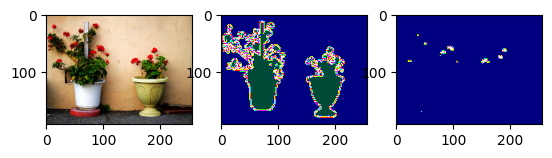

In [28]:
def seg_plot(image, target, pred):

    image = image.squeeze()
    image = torch.transpose(image, 0, 1)
    image = torch.transpose(image, 1, 2)

    target = target.squeeze()

    pred = torch.argmax(pred, dim=1)
    pred = pred.squeeze()
    print("predicted classes:\t" + str(pred.unique()))
    print("actual classes:\t" + str(target.unique()))

    figure = plt.figure()
    figure.add_subplot(1, 3, 1)
    plt.imshow(image)
    figure.add_subplot(1, 3, 2)
    plt.imshow(target, cmap="gist_ncar")
    figure.add_subplot(1, 3, 3)
    plt.imshow(pred, cmap="gist_ncar")





trainloader = DataLoader(voc_train, batch_size=1, shuffle=True)
image, target = next(iter(trainloader))
pred = net.forward(image)
seg_plot(image, target, pred)